In [ ]:
!pip install scikit-learn

In [2]:
!cd drive/MyDrive/Colab\ Notebooks

In [ ]:
!sudo apt-get install texlive-full

In [ ]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Função para ler o arquivo metadata.txt e obter o nome do artista e o gênero musical
def ler_metadata(metadata_file):
    with open(metadata_file, 'r', encoding='utf-8') as f:
        artist_name = f.readline().strip()
        genre = f.readline().strip()
    return artist_name, genre

# Função para ler o conteúdo do arquivo .txt (letra da música)
def ler_letra(letra_file):
    with open(letra_file, 'r', encoding='utf-8') as f:
        letra = f.read()
    return letra

# Função para ler o conteúdo do arquivo .html (cifra da música)
def ler_cifra(cifra_file):
    with open(cifra_file, 'r', encoding='utf-8') as f:
        cifra = f.read()
    return cifra

# Lista para armazenar os dados de cada música
data = []
# Percorrer recursivamente as pastas de artistas
for root, dirs, files in os.walk('/content/'):

    if '.config' in dirs:
        dirs.remove('.config')
    if '.ipynb_checkpoints' in dirs:
        dirs.remove('.ipynb_checkpoints')
    if 'sample_data' in dirs:
        dirs.remove('sample_data')

    artist_name, genre, letra, cifra = ["", "", "", ""]

    if os.path.exists(os.path.join(root,'metadata.txt')):
        artist_name, genre = ler_metadata(os.path.join(root,'metadata.txt'))

    for file in files:
        m_file = os.path.join(root, file)

        if '.html' in file:
            cifra = ler_cifra(m_file)
        else:
            letra = ler_letra(m_file)

        data.append({'Artist': artist_name, 'Genre': genre, 'Lyrics': letra, 'Chords': cifra})

# Criar um DataFrame com os dados coletados
df = pd.DataFrame(data)

# Visualizar o DataFrame
print(df.head())


          Artist  Genre                                             Lyrics  \
0  Amado Batista  Brega  Alucinação\n \nTentei me proibir de pensar em ...   
1  Amado Batista  Brega  Alucinação\n \nTentei me proibir de pensar em ...   
2  Amado Batista  Brega  O Fruto do Nosso Amor (Amor Perfeito)\n \nAmor...   
3  Amado Batista  Brega  O Fruto do Nosso Amor (Amor Perfeito)\n \nAmor...   
4  Amado Batista  Brega  Chance\n \nQuero te dizer baixinho \nCom todo ...   

                                              Chords  
0                                                     
1  <html><h1>O Pobretão<h1><div><pre><span class=...  
2  <html><h1>O Pobretão<h1><div><pre><span class=...  
3  <html><h1>Meu Ex-Amor<h1><div><pre>[Intro] <b>...  
4  <html><h1>Meu Ex-Amor<h1><div><pre>[Intro] <b>...  


In [ ]:
popularidade_generos = df['Genre'].value_counts()

# Visualizar os resultados
print(popularidade_generos)

Genre
Brega          41
Soul           41
Hard Rock      41
Sertanejo      39
Hip Hop/Rap    33
Name: count, dtype: int64


In [ ]:
df.groupby(['Artist', 'Genre']).size()

Artist         Genre      
Adele          Soul           41
Aerosmith      Hard Rock      41
Akon           Hip Hop/Rap    33
Amado Batista  Brega          41
Ana Castela    Sertanejo      39
dtype: int64

In [ ]:
df['comprimento_letra'] = df['Lyrics'].str.len()
df

,Artist,Genre,Lyrics,Chords,comprimento_letra
0,Amado Batista,Brega,Alucinação\n \nTentei me proibir de pensar em ...,,1352
1,Amado Batista,Brega,Alucinação\n \nTentei me proibir de pensar em ...,<html><h1>O Pobretão<h1><div><pre><span class=...,1352
2,Amado Batista,Brega,O Fruto do Nosso Amor (Amor Perfeito)\n \nAmor...,<html><h1>O Pobretão<h1><div><pre><span class=...,1654
3,Amado Batista,Brega,O Fruto do Nosso Amor (Amor Perfeito)\n \nAmor...,<html><h1>Meu Ex-Amor<h1><div><pre>[Intro] <b>...,1654
4,Amado Batista,Brega,Chance\n \nQuero te dizer baixinho \nCom todo ...,<html><h1>Meu Ex-Amor<h1><div><pre>[Intro] <b>...,700
...,...,...,...,...,...
190,Aerosmith,Hard Rock,Fly Away From Here\n \nWe gotta find a way \nY...,<html><h1>Fly Away From Here<h1><div><pre>[Int...,1538
191,Aerosmith,Hard Rock,Fly Away From Here\n \nWe gotta find a way \nY...,<html><h1>Pink<h1><div><pre>[Intro] <b>G</b> ...,1538
192,Aerosmith,Hard Rock,Fly Away From Here\n \nWe gotta find a way \nY...,"<html><h1>Crazy<h1><div><pre>Come here, baby\n...",1538
193,Aerosmith,Hard Rock,I Don't Want To Miss a Thing\n \nI could stay ...,"<html><h1>Crazy<h1><div><pre>Come here, baby\n...",2289


from matplotlib import pyplot as plt
df['comprimento_letra'].plot(kind='hist', bins=20, title='comprimento_letra')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Artist').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['comprimento_letra'].plot(kind='line', figsize=(8, 4), title='comprimento_letra')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Genre'].value_counts()
    for x_label, grp in df.groupby('Artist')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Artist')
_ = plt.ylabel('Genre')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Artist'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='comprimento_letra', y='Artist', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='comprimento_letra', y='Genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-7-f34304d9151b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='comprimento_letra', y='Genre', inner='stick', palette='Dark2')


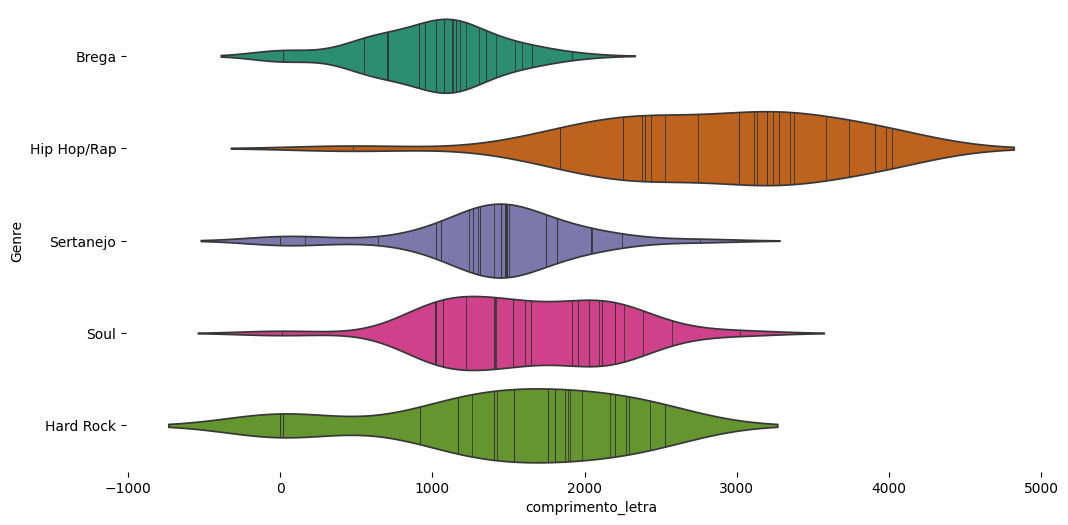

In [ ]:
figsize = (12, 1.2 * len(df['Genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='comprimento_letra', y='Genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-6-95fda5ecfb12>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='comprimento_letra', y='Artist', inner='stick', palette='Dark2')


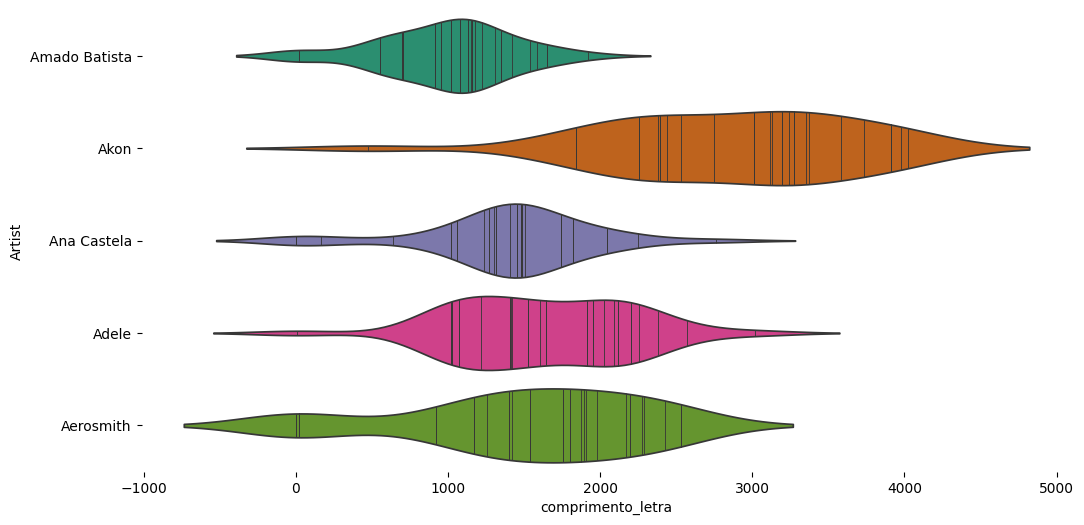

In [ ]:
figsize = (12, 1.2 * len(df['Artist'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='comprimento_letra', y='Artist', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

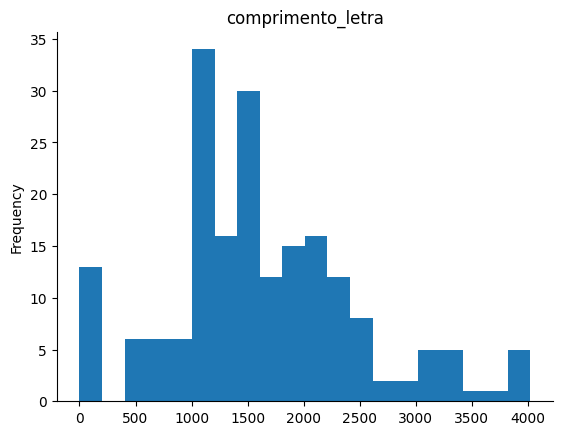

In [ ]:
df['comprimento_letra'].plot(kind='hist', bins=20, title='comprimento_letra')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-17-b1268b6a107f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='ocorrencias_amor_love', y='Genre', inner='stick', palette='Dark2')


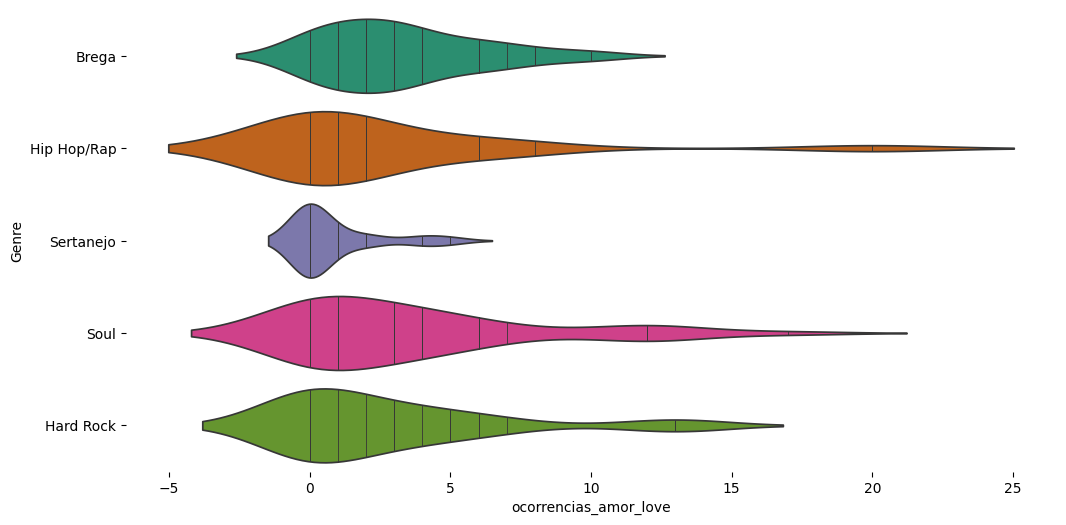

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Contabilizar a quantidade de vezes que as palavras "amor" ou "love" aparecem em cada música
df['ocorrencias_amor_love'] = df['Lyrics'].str.count('amor|love')

# Definir o tamanho da figura
figsize = (12, 1.2 * len(df['Genre'].unique()))

# Criar o gráfico de violino
plt.figure(figsize=figsize)
sns.violinplot(data=df, x='ocorrencias_amor_love', y='Genre', inner='stick', palette='Dark2')

# Remover bordas do gráfico
sns.despine(top=True, right=True, bottom=True, left=True)

# Mostrar o gráfico
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Criar uma matriz de frequência de palavras
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Lyrics'])

# Obter as palavras mais comuns
palavras_comuns = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Visualizar as palavras mais comuns
print(palavras_comuns.head(10))

you     2150
the     1558
me      1123
to       924
it       795
and      757
that     708
on       612
não      536
que      529
dtype: int64


In [28]:
import re

# Função para contar palavras entre as tags <b> e </b>
def contar_palavras_b(texto):
    # Encontrar todas as palavras entre as tags <b> e </b> usando expressão regular
    palavras = re.findall(r'<b>(.*?)</b>', texto)
    # Contar a ocorrência de cada palavra e retornar o resultado como um dicionário
    contador = {}
    for palavra in palavras:
        contador[palavra] = contador.get(palavra, 0) + 1
    return contador

# Aplicar a função contar_palavras_b à coluna "chord" e expandir o resultado em um DataFrame
contagem_palavras = df['Chords'].apply(contar_palavras_b).apply(pd.Series).fillna(0).astype(int)

# Exibir o DataFrame resultante
print(contagem_palavras)

      E   A   B  C#m  E7   G   D  C  A7  F  ...  F#m7/5-  G7sus  E4  D4  B9  \
0     0   0   0    0   0   0   0  0   0  0  ...        0      0   0   0   0   
1    23  16  19    5   0   0   0  0   0  0  ...        0      0   0   0   0   
2    23  16  19    5   0   0   0  0   0  0  ...        0      0   0   0   0   
3    15  10  16    0   2   0   0  0   0  0  ...        0      0   0   0   0   
4    15  10  16    0   2   0   0  0   0  0  ...        0      0   0   0   0   
..   ..  ..  ..  ...  ..  ..  .. ..  .. ..  ...      ...    ...  ..  ..  ..   
190  20  13   0    8   0   3   0  0   0  0  ...        0      0   0   0  13   
191   0   0   0    0   0  30   1  3   4  3  ...        0      0   0  13   0   
192  27  27   0    2   0   8  41  0   0  0  ...        0      0   0   0   0   
193  27  27   0    2   0   8  41  0   0  0  ...        0      0   0   0   0   
194  27  27   0    2   0   8  41  0   0  0  ...        0      0   0   0   0   

     F6(9)  F2  D9(11)  D6(9/11)  D6(9)  
0        

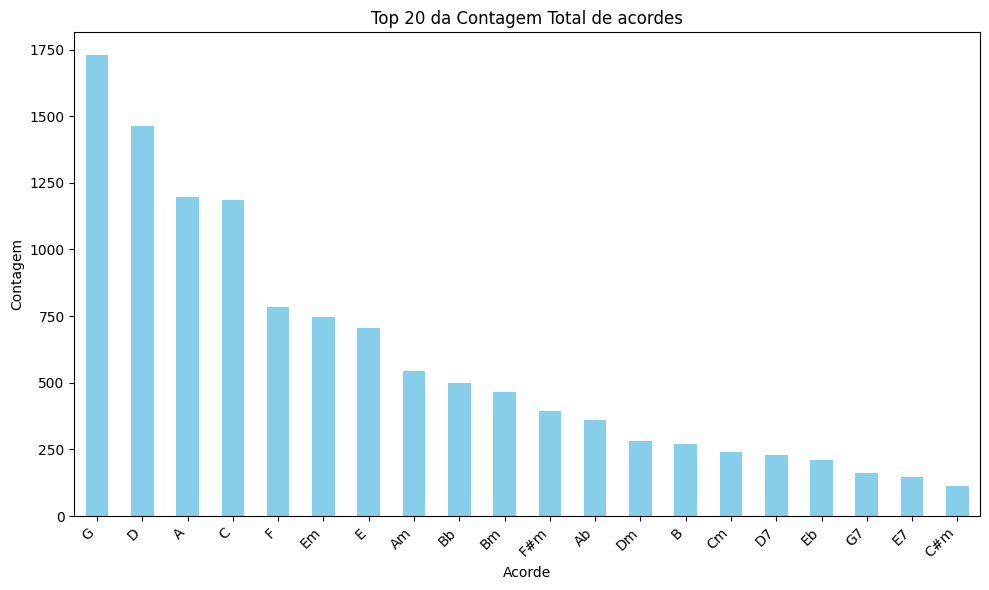

In [23]:
import matplotlib.pyplot as plt

# Obter o top 20 das contagens totais de palavras
top_20_contagem_total = contagem_total.sort_values(ascending=False).head(20)

# Plotar um gráfico de barras do top 20 das contagens totais de palavras
plt.figure(figsize=(10, 6))
top_20_contagem_total.plot(kind='bar', color='skyblue')
plt.title('Top 20 da Contagem Total de acordes')
plt.xlabel('Acorde')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Função para ler todos os arquivos de texto em um diretório
def ler_arquivos_texto(diretorio):
    textos = []
    for arquivo in os.listdir(diretorio):
        print(arquivo)
        if arquivo.endswith(".txt"):
            with open(os.path.join(diretorio, arquivo), "r", encoding="utf-8") as f:
                sia = SentimentIntensityAnalyzer()
                t = f.read()
                sentiment_score = sia.polarity_scores(t)
                print(sentiment_score)
                textos.append(t)

    return textos

# Diretório onde os arquivos de texto estão localizados
diretorio = "/content/aerosmith/"

# Ler os arquivos de texto
textos = ler_arquivos_texto(diretorio)

# Vetorização dos textos usando TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(textos)

# Execução do algoritmo KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Exibir os clusters e suas palavras-chave
print("Palavras-chave dos clusters:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(3):  # Altere o número de clusters conforme necessário
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:  # Altere o número de palavras-chave exibidas conforme necessário
        print(' %s' % terms[ind])


LoveInAnElevator_cifra.html
IDontWantToMissaThing_cifra.html
Cryin.txt
{'neg': 0.115, 'neu': 0.661, 'pos': 0.223, 'compound': 0.9937}
WhatCouldHaveBeenLove_cifra.html
DudeLooksLikeaLady_cifra.html
Jaded.txt
{'neg': 0.307, 'neu': 0.592, 'pos': 0.101, 'compound': -0.9967}
WaterSongJaniesGotaGun_cifra.html
metadata.txt
{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.1027}
AintThataBitch_cifra.html
FullCircle_cifra.html
Jaded_cifra.html
LoveInAnElevator.txt
{'neg': 0.027, 'neu': 0.709, 'pos': 0.264, 'compound': 0.9992}
LivinOnTheEdge.txt
{'neg': 0.09, 'neu': 0.829, 'pos': 0.081, 'compound': -0.7093}
Cryin_cifra.html
LivinOnTheEdge_cifra.html
WhatItTakes_cifra.html
Pink.txt
{'neg': 0.033, 'neu': 0.712, 'pos': 0.256, 'compound': 0.995}
DreamOn_cifra.html
SweetEmotion_cifra.html
Amazing.txt
{'neg': 0.119, 'neu': 0.608, 'pos': 0.273, 'compound': 0.9962}
WalkThisWay.txt
{'neg': 0.026, 'neu': 0.817, 'pos': 0.156, 'compound': 0.9931}
SweetEmotion.txt
{'neg': 0.106, 'neu': 0.606, 'pos': 0.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
